In [18]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [19]:
#read dataset CustomersData.xlsx

file_path_customer = 'Datasets/CustomersData.xlsx'
df1 = pd.read_excel(file_path_customer)
print(df1.head())  # Display the first few rows
print(df1.info())  # Get information about the DataFrame
print(df1.describe())  # Summarize the numerical data


   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None
         CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.959667
min    12346.000000       2.000000
25%    13830.500000      14.000000
50%    15300.000000      26.000000
75%    16882.250000      38.000000
max    18283

In [20]:
#read dataset Discount_Coupon.csv

file_path_coupon = 'Datasets/Discount_Coupon.csv'
df2 = pd.read_csv(file_path_coupon)
print(df2.head())  # Display the first few rows
print(df2.info())  # Get information about the DataFrame
print(df2.describe())  # Summarize the numerical data

  Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30
3   Jan          Nest-USA      ELEC10            10
4   Feb          Nest-USA      ELEC20            20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None
       Discount_pct
count    204.000000
mean      20.000000
std        8.185052
min       10.000000
25%       10.000000
50%       20.000000
75%       30.000000
max       30.000000


In [21]:
#read dataset Marketing_Spend.csv

file_path_marketing = 'Datasets/Marketing_Spend.csv'
df3 = pd.read_csv(file_path_marketing)
print(df3.head())  # Display the first few rows
print(df3.info())  # Get information about the DataFrame
print(df3.describe())  # Summarize the numerical data

       Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36
2  1/3/2019           4500       1576.38
3  1/4/2019           4500       2928.55
4  1/5/2019           4500       4055.30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None
       Offline_Spend  Online_Spend
count     365.000000    365.000000
mean     2843.561644   1905.880740
std       952.292448    808.856853
min       500.000000    320.250000
25%      2500.000000   1258.600000
50%      3000.000000   1881.940000
75%      3500.000000   2435.120000
max      5000.000000   4556.930000


In [22]:
#read dataset Online_Sales.csv

file_path_sales = 'Datasets/Online_Sales.csv'
df4 = pd.read_csv(file_path_sales)
print(df4.head())  # Display the first few rows
print(df4.info())  # Get information about the DataFrame
print(df4.describe())  # Summarize the numerical data

   CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0       17850           16679          20190101  GGOENEBJ079499   
1       17850           16680          20190101  GGOENEBJ079499   
2       17850           16681          20190101  GGOEGFKQ020399   
3       17850           16682          20190101  GGOEGAAB010516   
4       17850           16682          20190101  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Transaction_Date_V2  
0         1     153.71               6.5          Used          2019-01-01  
1   

In [23]:
#read dataset Tax_amount.xlsx

file_path_tax = 'Datasets/Tax_amount.xlsx'
df5 = pd.read_excel(file_path_tax)
print(df5.head())  # Display the first few rows
print(df5.info())  # Get information about the DataFrame
print(df5.describe())  # Summarize the numerical data

  Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18
4        Drinkware  0.18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes
None
             GST
count  20.000000
mean    0.116500
std     0.052443
min     0.050000
25%     0.087500
50%     0.100000
75%     0.180000
max     0.180000


In [24]:
#read the combined dataset Dataset.xlsx

file_path_dataset = 'Datasets/Dataset.xlsx'
df6 = pd.read_excel(file_path_dataset)
print(df6.head())  # Display the first few rows
print(df6.info())  # Get information about the DataFrame
print(df6.describe())  # Summarize the numerical data

   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None
         CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.959667
min    12346.000000       2.000000
25%    13830.500000      14.000000
50%    15300.000000      26.000000
75%    16882.250000      38.000000
max    18283

In [42]:
# find purchase frequency

import pandas as pd

# Load your customer transaction data
transaction_data = df4

# Display the first few rows of the dataset
#print(transaction_data.head())

# Assuming you have a column 'CustomerID' and 'PurchaseDate'
# Convert 'PurchaseDate' to datetime format
transaction_data['Transaction_Date_V2'] = pd.to_datetime(transaction_data['Transaction_Date_V2'])

# Calculate the purchase frequency for each customer
df4['purchase_frequency'] = transaction_data.groupby('CustomerID')['Transaction_Date_V2'].count().fillna(0)

# Calculate purchase frequency
#df4['PurchaseFrequency'] = transaction_data.groupby('CustomerID')['Transaction_Date_V2'].diff().dt.days.fillna(0)

# Display the purchase frequency for each customer
# print(df4['CustomerID','PurchaseFrequency'])
purchase_frequency = df4[['CustomerID','purchase_frequency']]
purchase_frequency



# avg_purchase_frequency = sum_purchase_frequency/len('CustomerID')
# avg_purchase_frequency

,CustomerID,purchase_frequency
0,17850,NaN
1,17850,NaN
2,17850,NaN
3,17850,NaN
4,17850,NaN
...,...,...
52919,14410,NaN
52920,14410,NaN
52921,14410,NaN
52922,14600,NaN


In [26]:
sum_purchase_frequency = df4['purchase_frequency'].sum()
sum_purchase_frequency

52924.0

In [27]:
total_customer = df4['CustomerID'].nunique()
total_customer

1468

In [28]:
avg_purchase_frequency = sum_purchase_frequency/total_customer
avg_purchase_frequency

36.05177111716621

In [29]:
highest_purchase_frequency = df4['purchase_frequency'].max()
highest_purchase_frequency


695.0

In [30]:
lowest_purchase_frequency = df4['purchase_frequency'].min()
lowest_purchase_frequency

1.0

In [31]:
mean_purchase_frequency = df4['purchase_frequency'].mean()
mean_purchase_frequency

36.05177111716621

In [32]:
median_purchase_frequency = df4['purchase_frequency'].median()
median_purchase_frequency

21.0

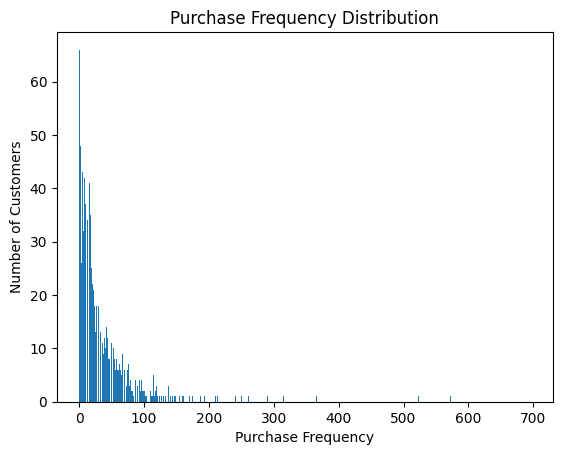

In [33]:
purchase_frequency_counts = df4['purchase_frequency'].value_counts()
# Plot PurchaseFrequency distribution
plt.bar(purchase_frequency_counts.index, purchase_frequency_counts.values)
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Purchase Frequency Distribution')
plt.show()

In [ ]:
# category with highest purchase rate

transaction_data = df4


In [34]:
features = df3[['Online_Spend', 'Offline_Spend']]

# Handling missing values if needed
features = features.fillna(0)

# Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the Number of Clusters (K)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

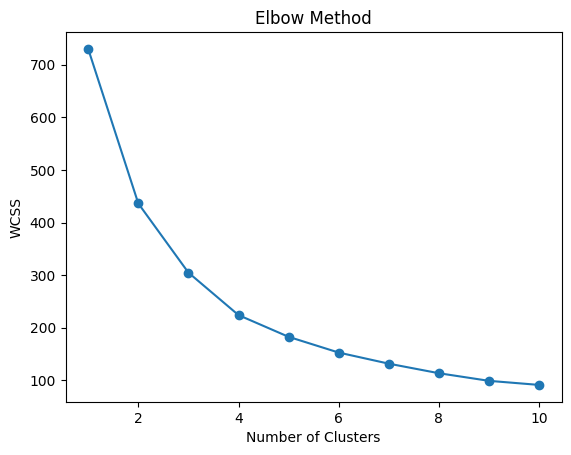

In [35]:
# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Online_Spend  Offline_Spend
Cluster                             
0         1242.432700    2995.000000
1         2292.302407    2513.888889
2         1086.045556    1331.481481
3         2064.750635    3873.015873
4         3377.719750    3775.000000


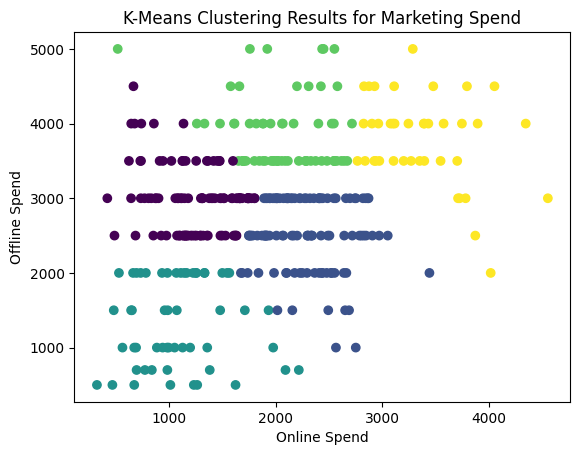

In [36]:
# Fit K-Means Model
k = 5  # Choose based on the elbow method or business knowledge
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df3['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze Clusters
numeric_columns = ['Online_Spend', 'Offline_Spend']

# Ensure the specified columns exist in df3
if all(col in df3.columns for col in numeric_columns):
    cluster_analysis = df3.groupby('Cluster')[numeric_columns].mean()
    print(cluster_analysis)

    # Visualize Results
    plt.scatter(df3['Online_Spend'], df3['Offline_Spend'], c=df3['Cluster'], cmap='viridis')
    plt.xlabel('Online Spend')
    plt.ylabel('Offline Spend')
    plt.title('K-Means Clustering Results for Marketing Spend')
    plt.show()
else:
    print("Specified numeric columns not found in the DataFrame.")


C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

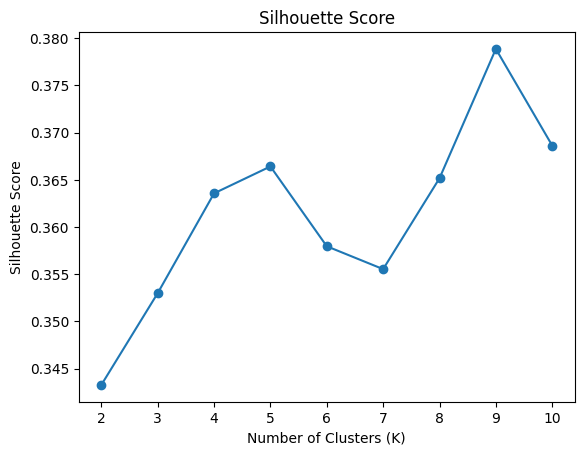

In [37]:
from sklearn.metrics import silhouette_score

sil_scores = []

# Try different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, labels)
    sil_scores.append(sil_score)

# Plot the Silhouette Score graph
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

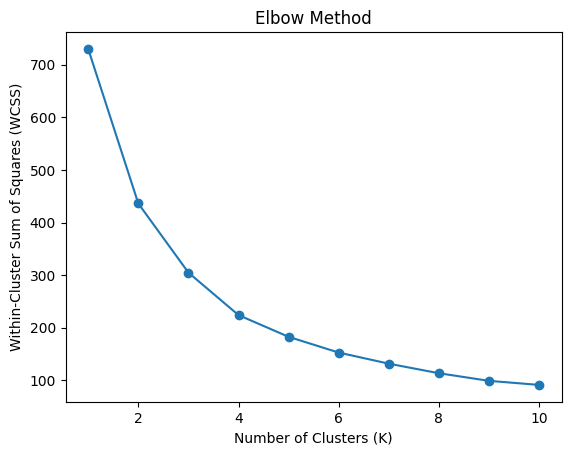

In [38]:
wcss = []

# Try different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()
